In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,15)

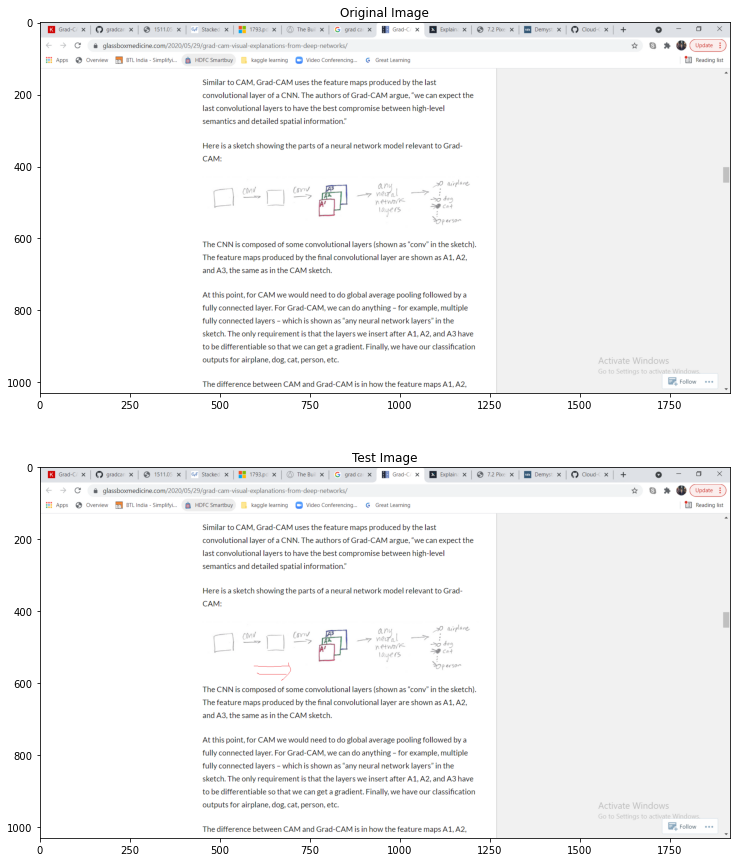

In [47]:
org = cv2.imread('Org.PNG')
dup = cv2.imread('dup.PNG')

org = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)
dup = cv2.cvtColor(dup, cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(20,15))

fig.add_subplot(2,1,1)
plt.imshow(org)
plt.title("Original Image")

fig.add_subplot(2,1,2)
plt.imshow(dup)
plt.title("Test Image")

plt.show()

In [48]:
if org.shape == dup.shape:
    print("Images are of same shape")
else:
    print("Images are of different shape, need to convert to same shape")

Images are of same shape


In [54]:
diff = cv2.subtract(org, dup)
b,g,r = cv2.split(diff)

In [55]:
if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
    print("images are completly equal")
else:
    print("Images are having some variations")

Images are having some variations


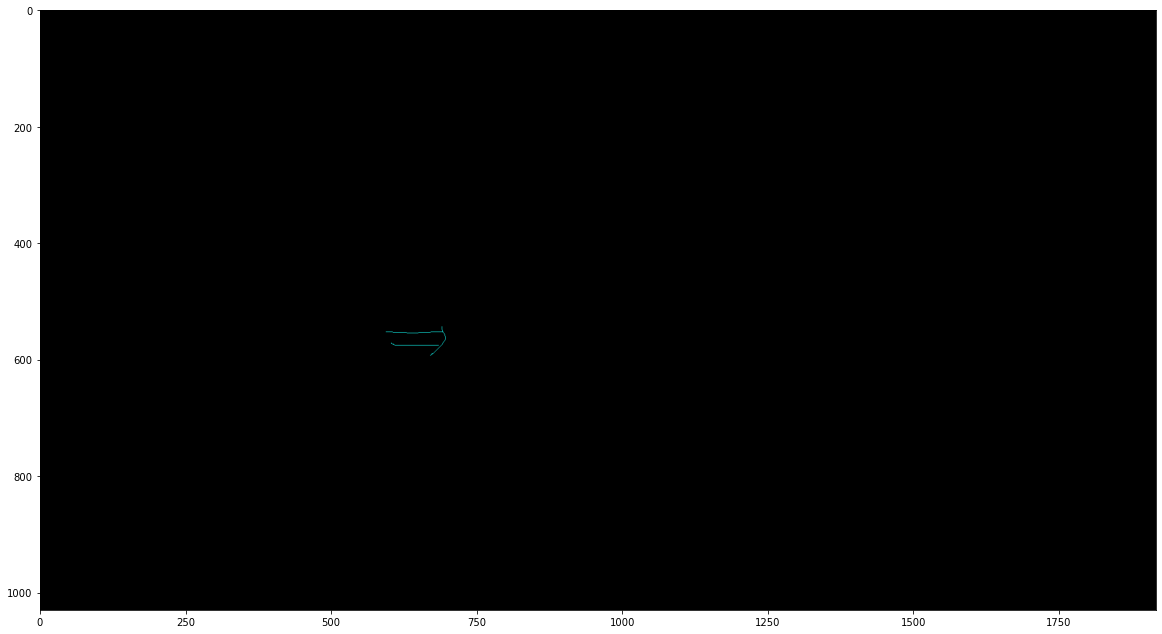

In [56]:
plt.imshow(diff)

In [57]:
gray = cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)

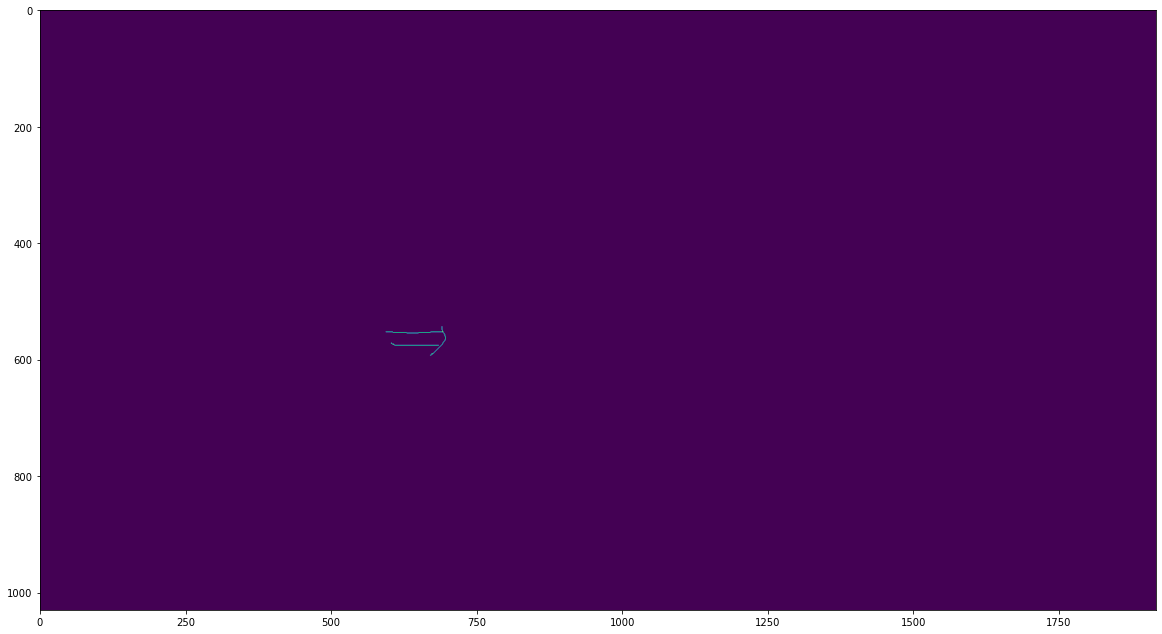

In [58]:
plt.imshow(gray)

In [18]:
cv2.imwrite('diff.PNG', diff)

True

### New diff approach

In [62]:
!pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=addd1969b418fa9f88ff71d3f87364462a68368bed48055eb90d224511aeafd9
  Stored in directory: c:\users\manoj-pc\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


In [64]:
import imutils

In [65]:
org = imutils.resize(org, height=600)
dup = imutils.resize(dup, height=600)

In [67]:
diff2 = org.copy()

In [68]:
cv2.absdiff(org, dup, diff2)

#converting the difference into grayscale images
gray = cv2.cvtColor(diff2, cv2.COLOR_BGR2GRAY)
 

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [72]:
#increasing the size of differences after that we can capture them all

for i in range(0,3):
    dilated = cv2.dilate(gray.copy(), None, iterations= i+ 1)

In [73]:
#threshold the gray image to binary it. Anything pixel that has
#value higher than 3 we are converting to white
#(remember 0 is black and 255 is exact white)
#the image is called binarised as any value lower than 3 will be 0 and
# all of the values equal to and higher than 3 will be 255
(T, thresh) = cv2.threshold(dilated, 3, 255, cv2.THRESH_BINARY)

In [74]:

# now we have to find contours in the binarized image
cnts = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [76]:
for c in cnts:
    # nicely fiting a bounding box to the contour
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(dup, (x, y), (x + w, y + h), (0, 255, 0), 2)

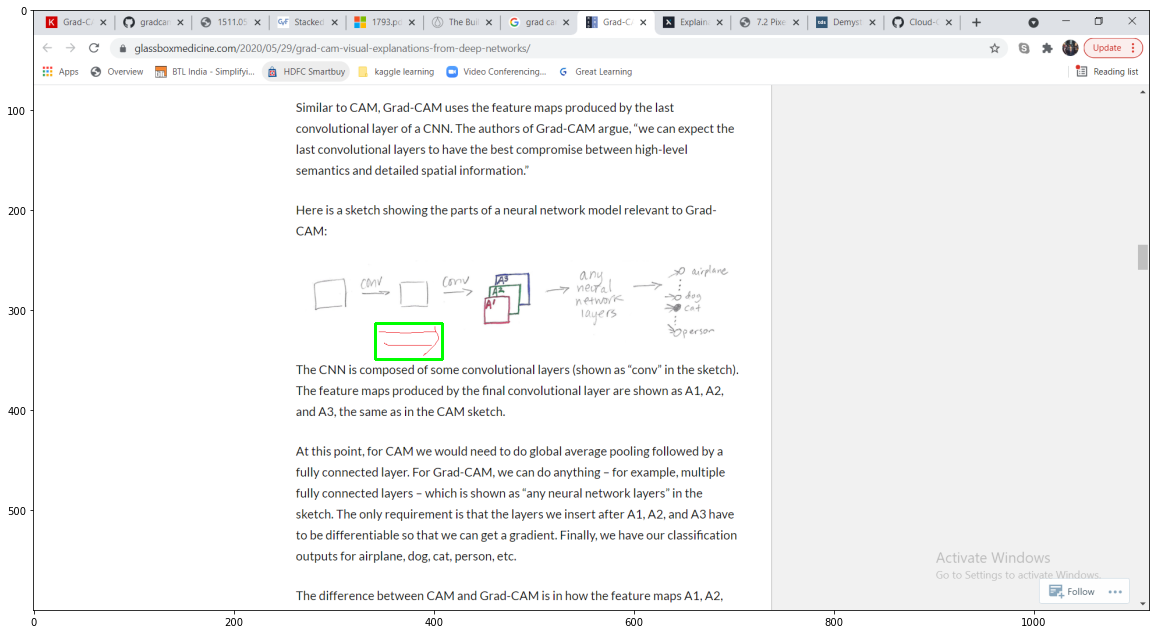

In [77]:
plt.imshow(dup)

### Using PIL only

In [80]:
from PIL import Image, ImageChops, ImageDraw
point_table = ([0] + ([255] * 255))

def new_gray(size, color):
    img = Image.new('L',size)
    dr = ImageDraw.Draw(img)
    dr.rectangle((0,0) + size, color)
    return img

def black_or_b(a, b, opacity=0.85):
    diff = ImageChops.difference(a, b)
    diff = diff.convert('L')
    # Hack: there is no threshold in PIL - L,
    # so we add the difference with itself to do
    # a poor man's thresholding of the mask: 
    #(the values for equal pixels-  0 - don't add up)
    thresholded_diff = diff
    for repeat in range(3):
        thresholded_diff  = ImageChops.add(thresholded_diff, thresholded_diff)
    h,w = size = diff.size
    mask = new_gray(size, int(255 * (opacity)))
    shade = new_gray(size, 0)
    new = a.copy()
    new.paste(shade, mask=mask)
    # To have the original image show partially
    # on the final result, simply put "diff" instead of thresholded_diff bellow
    new.paste(b, mask=thresholded_diff)
    return new


a = Image.open('Org.PNG')
b = Image.open('dup.PNG')
c = black_or_b(a, b)
#c.save('c.png')

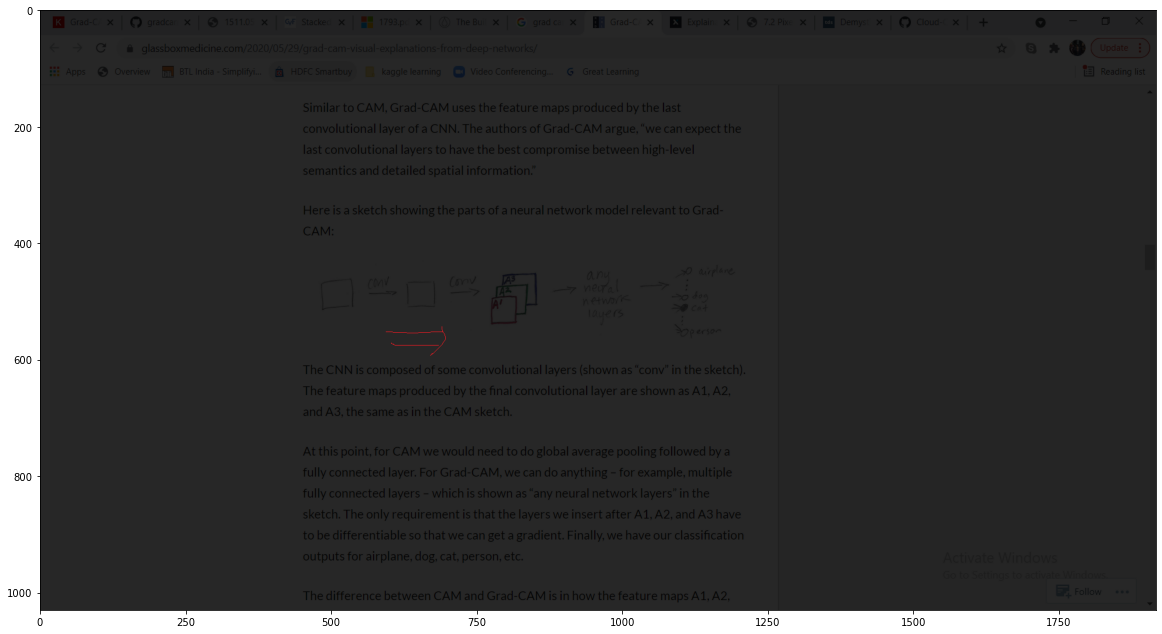

In [81]:
plt.imshow(c)